<a href="https://colab.research.google.com/github/componavt/sns4human/blob/main/src/vk/nlp/lemma_tag_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script processes text data, tokenizes and lemmatizes it, and then produces a Tag Cloud in Russian and English.

Этот скрипт обрабатывает текстовые данные, токенизирует и лемматизирует их, формирует частотные списки слов с дальнейшим получением Облака слов на русском и английском языке.

In [9]:
!pip install -q googletrans==3.1.0a0
!pip install -q -U pymorphy3
!pip install -q emoji
import pandas as pd
import requests
import csv
from io import StringIO
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from googletrans import Translator
filename = 'text_preprocessing.py'
response = requests.get(f'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/src/vk/nlp/{filename}')
with open(filename,'w+') as f:
  f.write(response.text)
import text_preprocessing
translator = Translator()

In [2]:
posts = {
    'state': [
        'aparfenchikov',
        'minnazrk'
    ],
    'museum': [
        'rk_nationalmuseum',
        'olonmus'
    ]
}

dicts_lemm = {}

**Частотный список всех слов по группам: официальные и музейные. В списке рассматриваются только те слова, которых нет в другой группе.**

In [3]:
for key in posts.keys():
    dicts_lemm[key] = {}
    for url in posts[key]:
        df = pd.read_csv(f'https://raw.githubusercontent.com/componavt/sns4human/refs/heads/main/data/vk/posts/{url}.csv', usecols=[1])
        df = df[df['text'].apply(lambda x: isinstance(x, str))]
        df['tokens'] = df['text'].apply(text_preprocessing.process_text)
        for post in df['tokens']:
            for word in post.split():
              if dicts_lemm[key].get(word, 0) == 0:
                  dicts_lemm[key][word] = 1
              else:
                  dicts_lemm[key][word] += 1
    dicts_lemm[key] = dict(sorted(dicts_lemm[key].items(), key=lambda item: item[1], reverse=True))

In [4]:
freq_words = {}

for key in dicts_lemm.keys():
    freq_words[key] = {}
    for lemma, count in dicts_lemm[key].items():
        if len(freq_words[key]) == 100:
            break
        for another_key in posts.keys():
            if key != another_key:
                if lemma not in dicts_lemm[another_key]:
                    freq_words[key][lemma] = count
            elif len(posts.keys()) == 1:
                freq_words[key][lemma] = count

    d = {'Частотные слова': freq_words[key].keys(), 'Частота': freq_words[key].values()}
    df = pd.DataFrame(data=d)
    df.to_csv('frequency_' + key + '_groups.csv', index=False, encoding='utf-8')

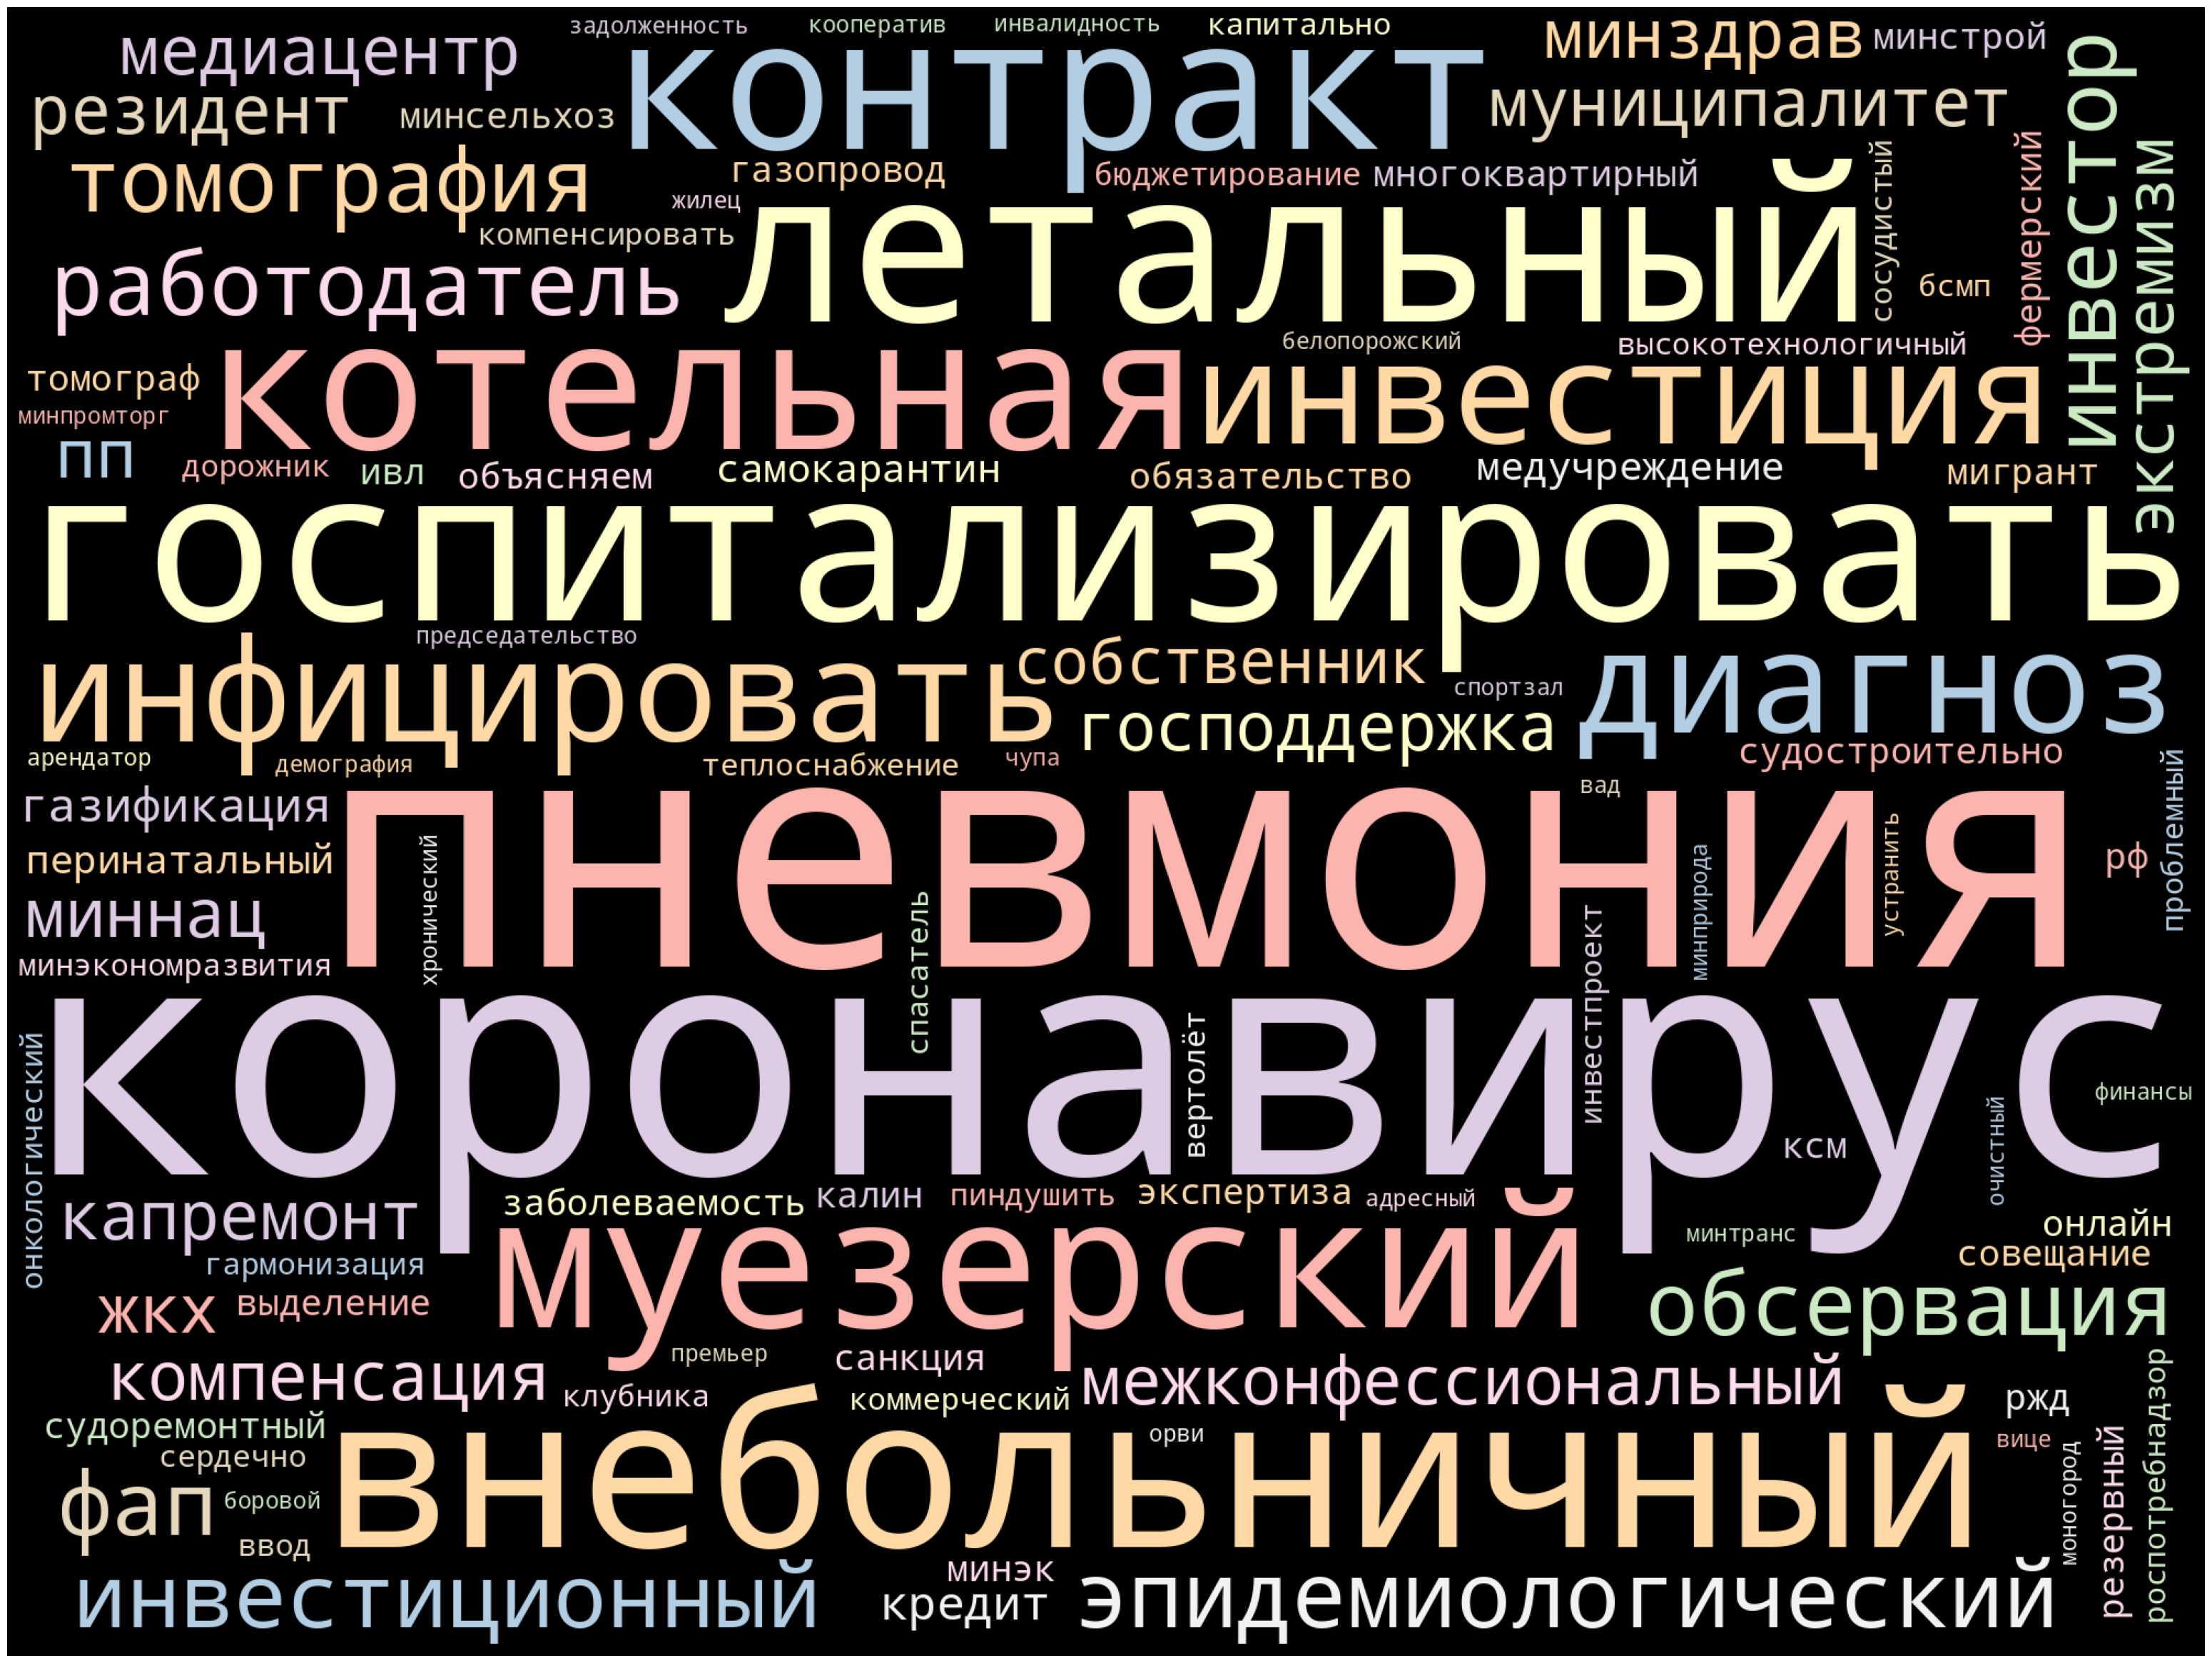

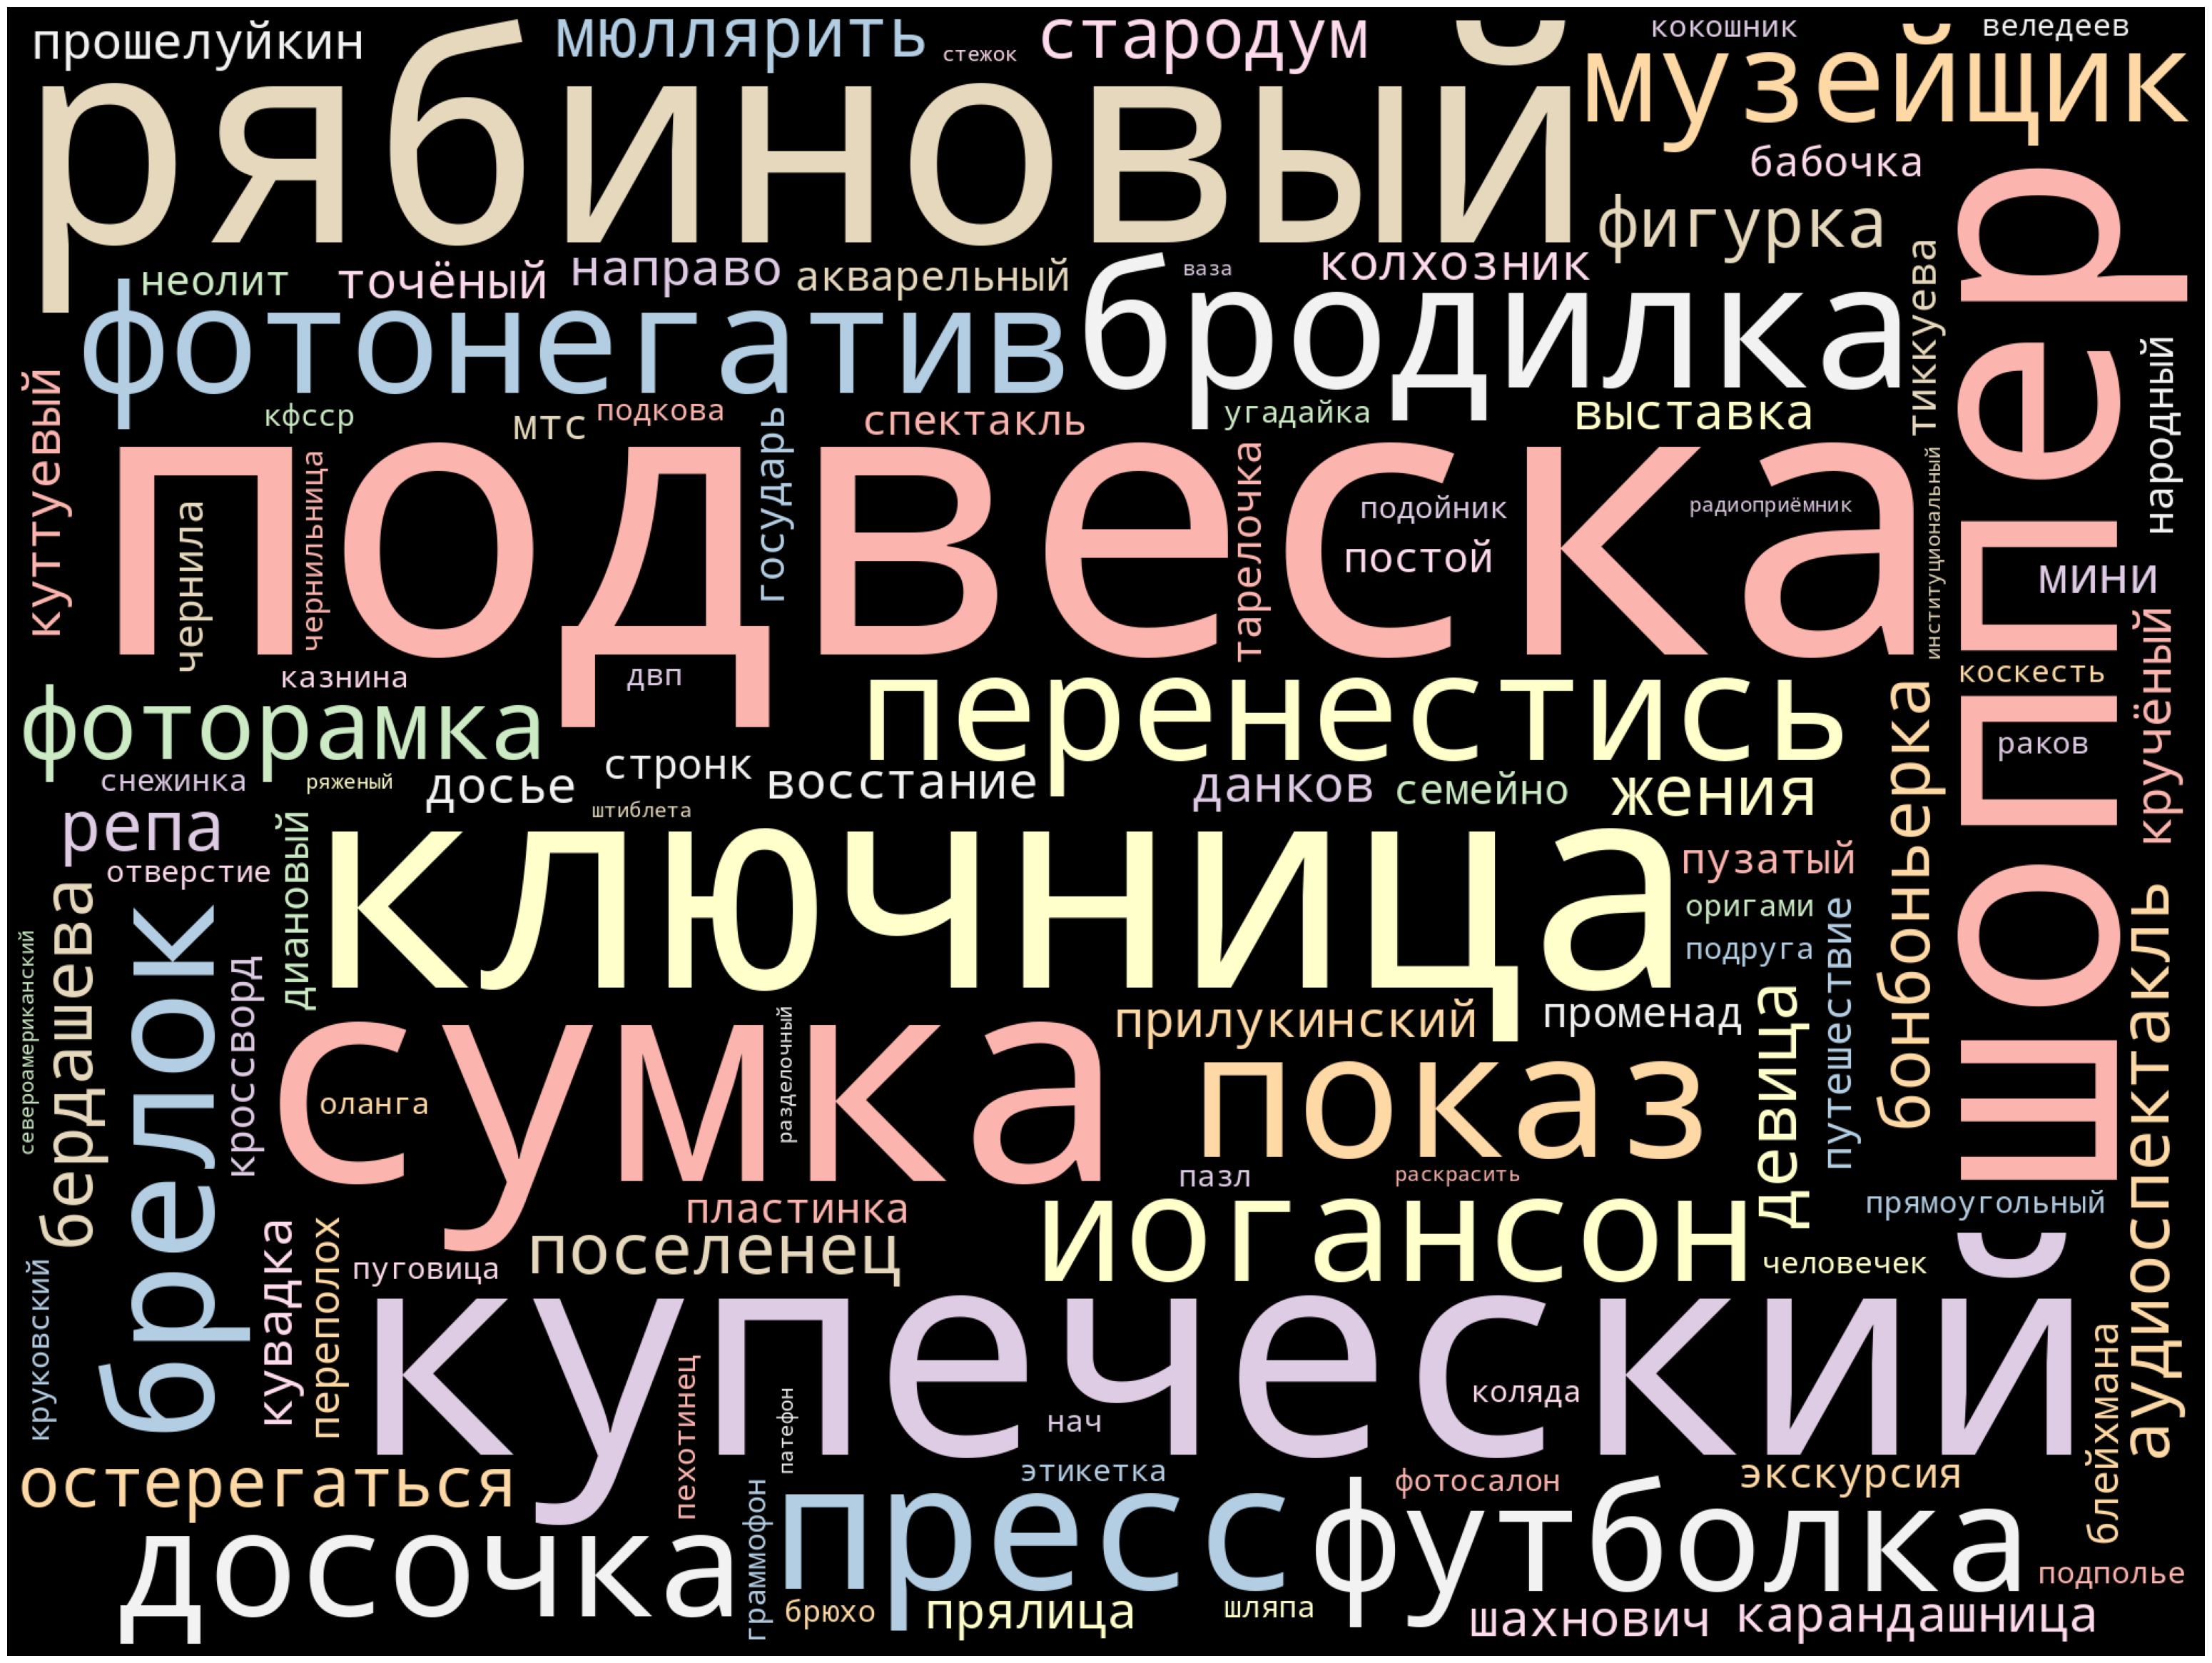

In [5]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

for key in posts.keys():
  text = ''
  words = pd.read_csv('frequency_' + key +'_groups.csv', index_col=None)["Частотные слова"].tolist()
  for word in words:
     text += word + ' '

  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False).generate(text)
  plot_cloud(wordcloud)

**Английская версия облака  тэгов**

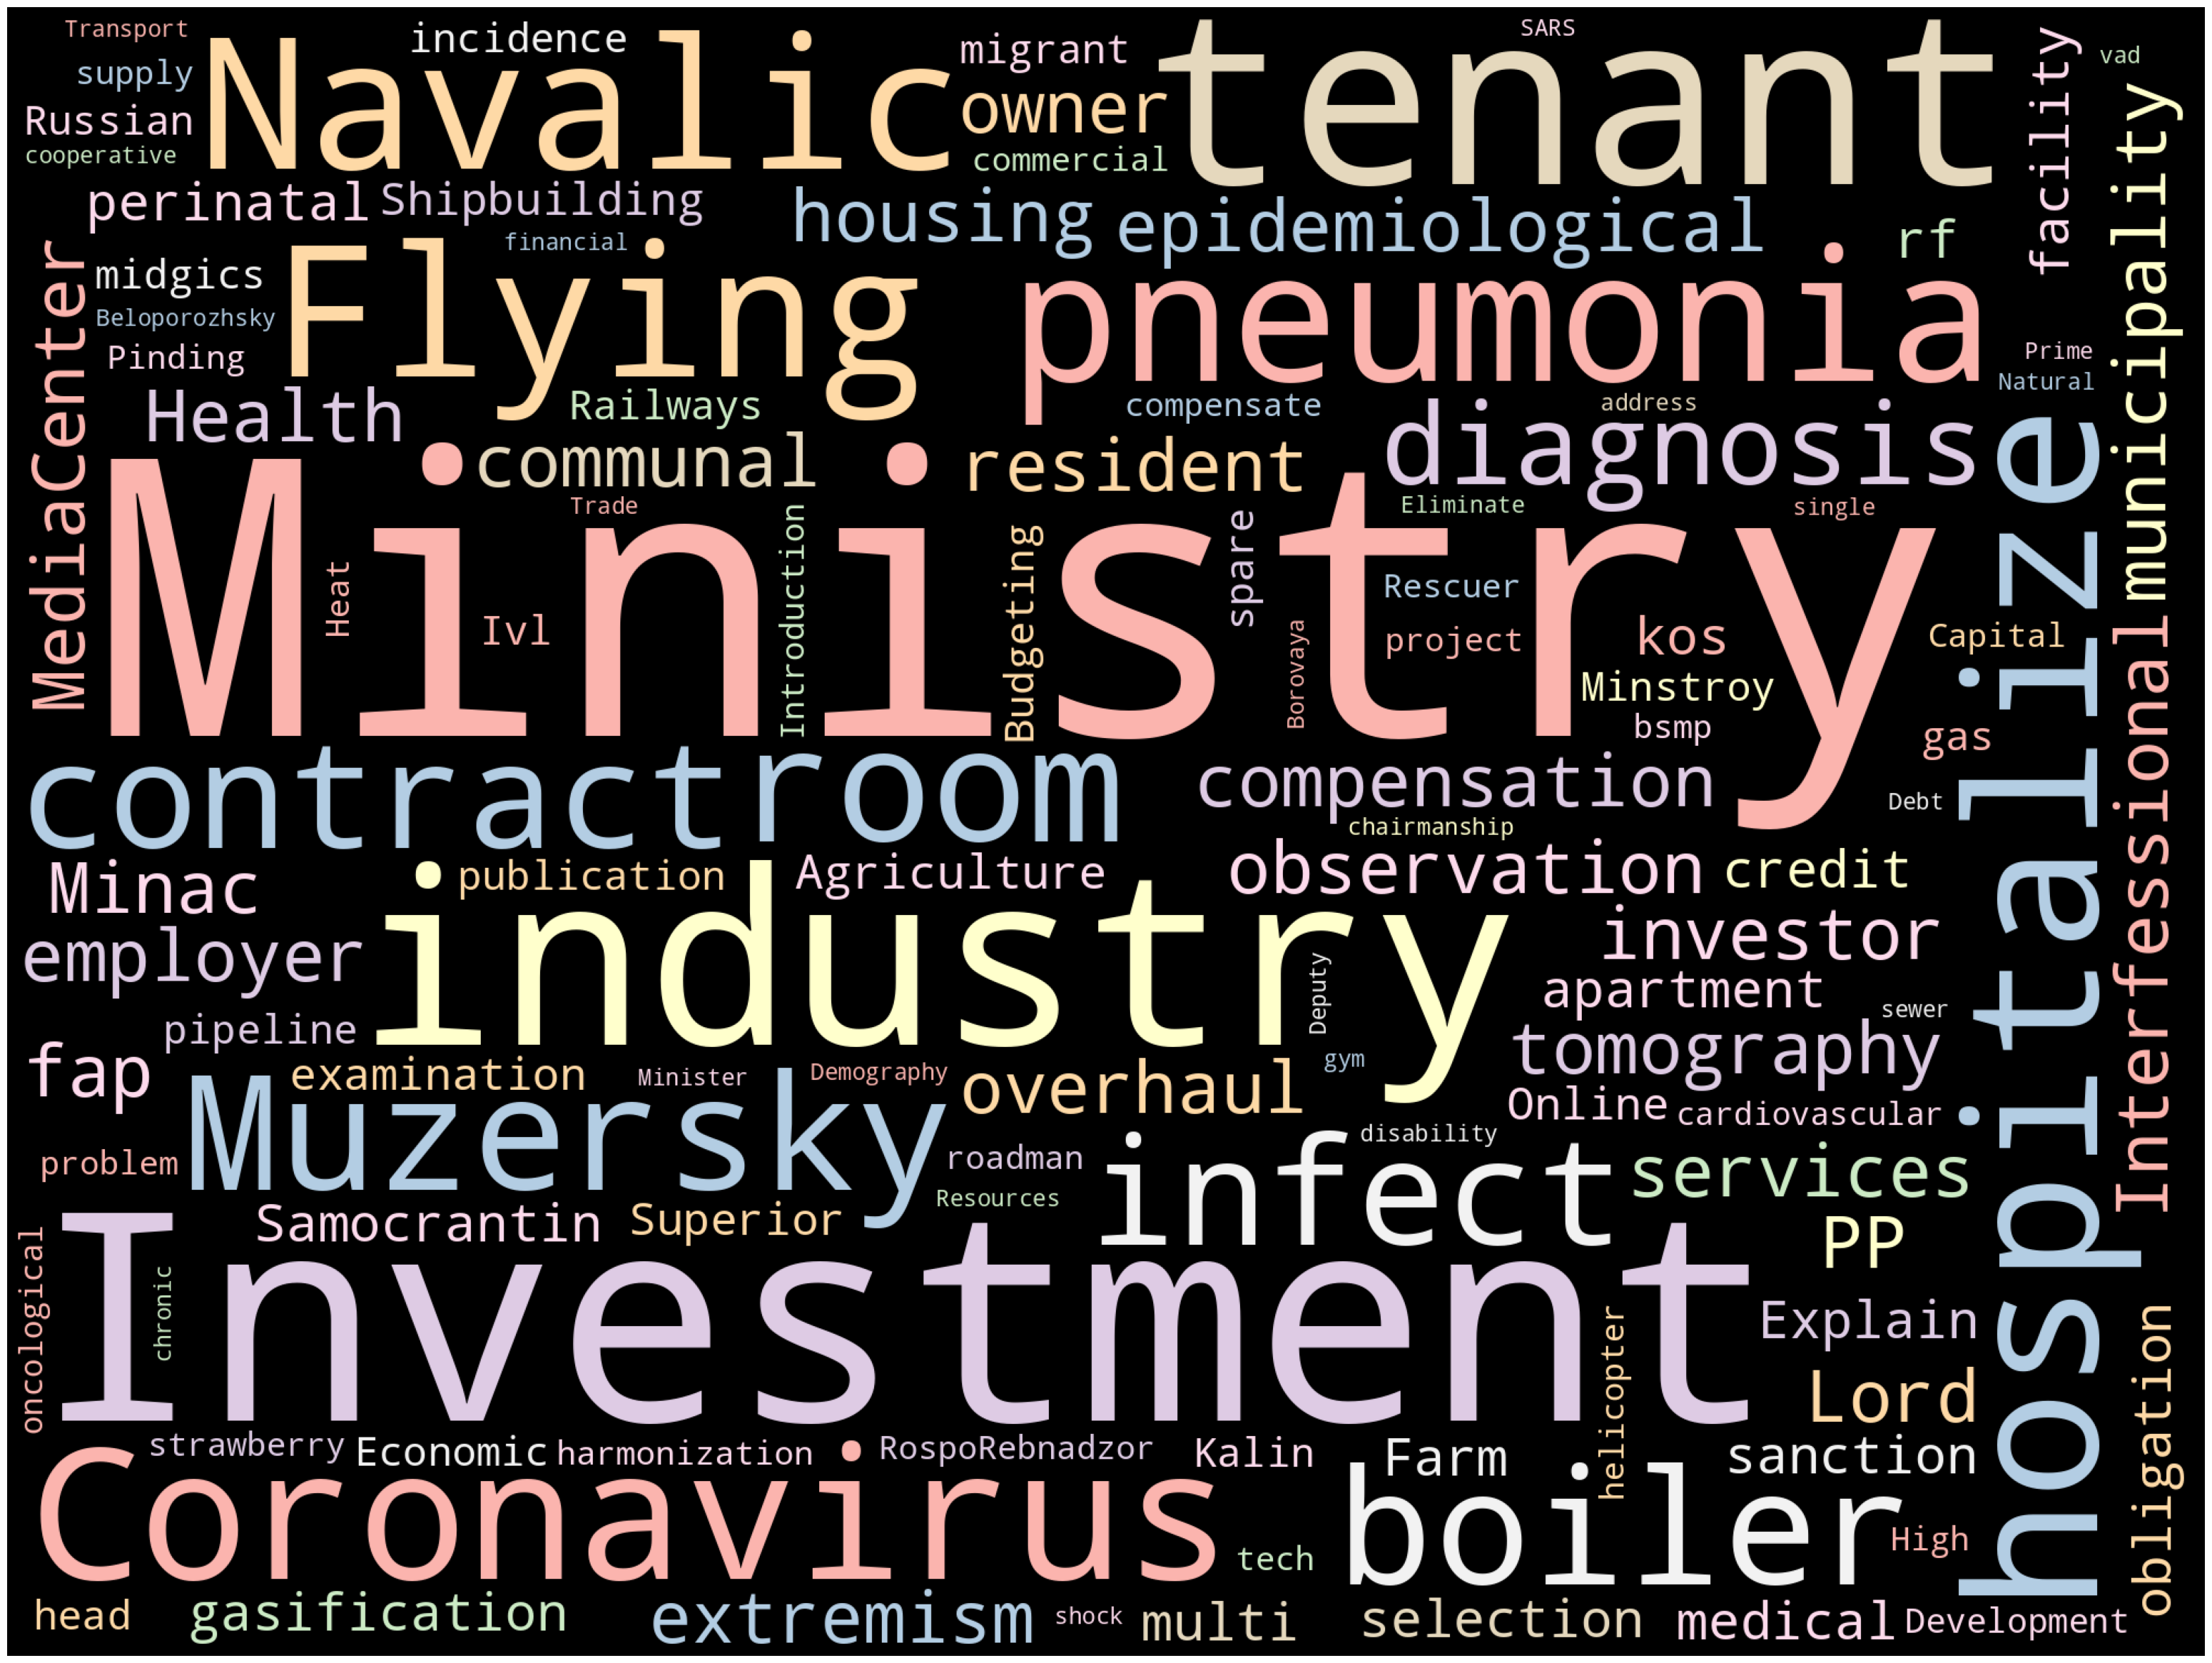

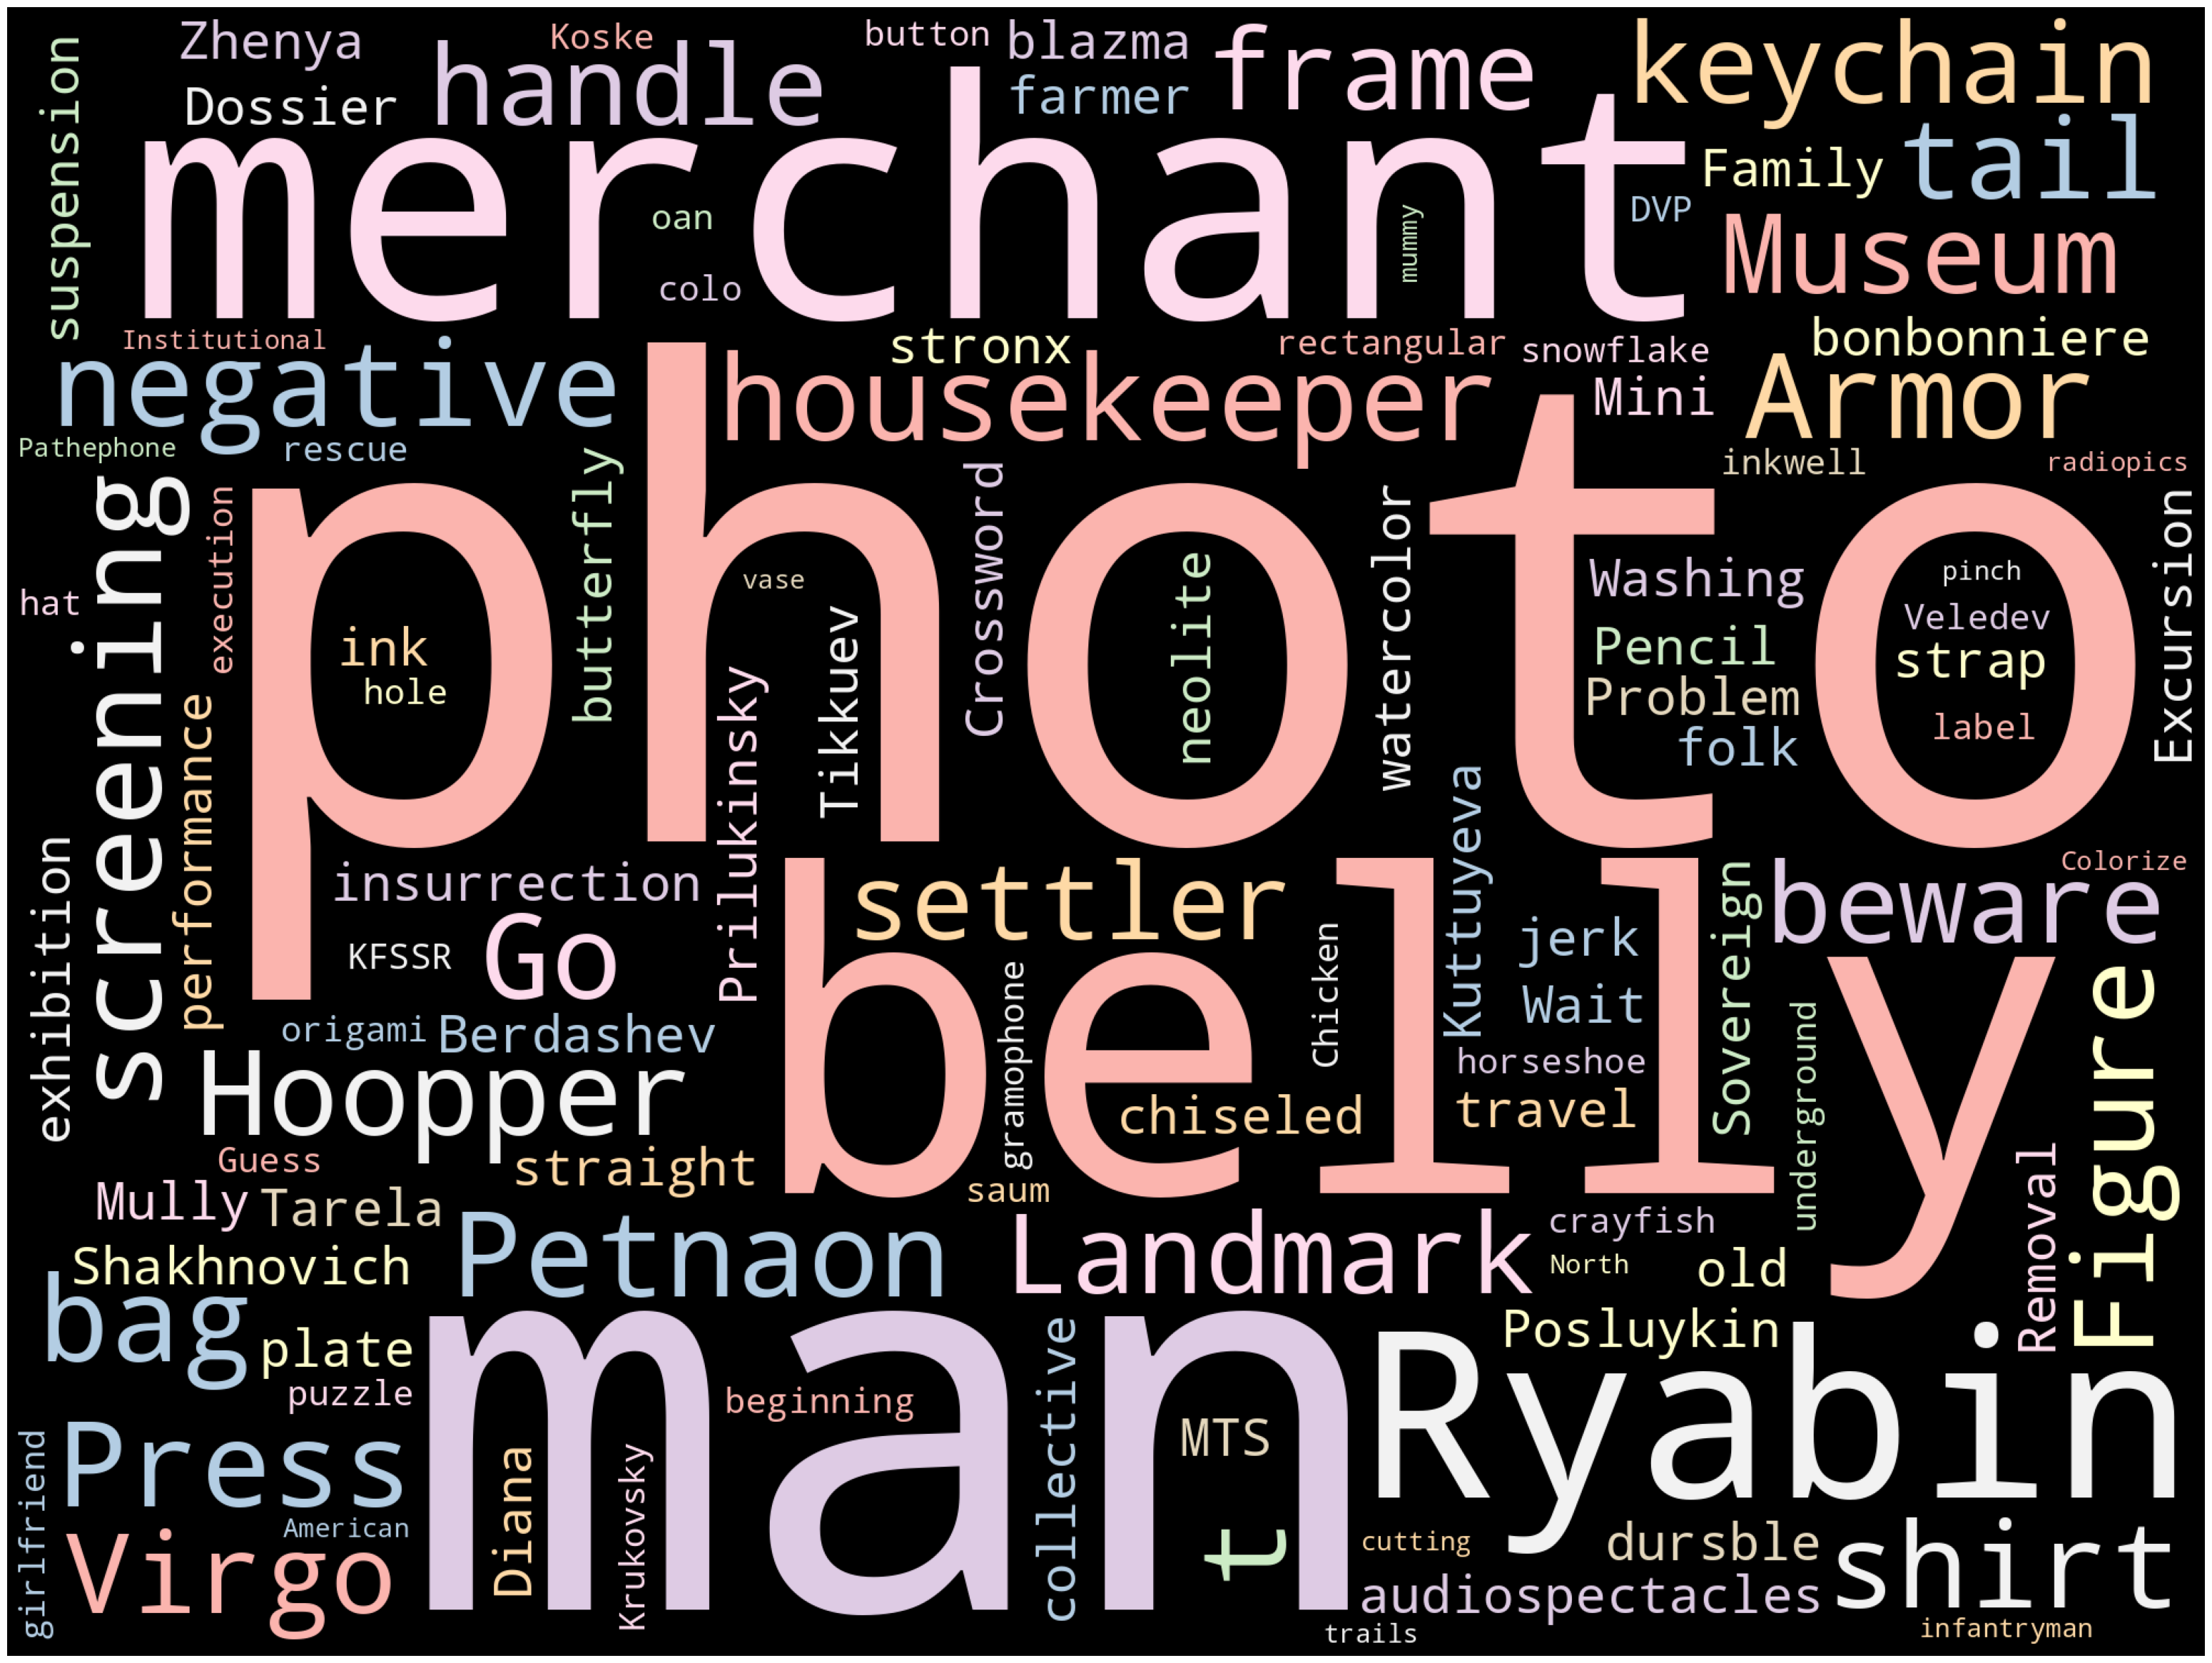

In [10]:
for key in posts.keys():
  text = ''
  words = pd.read_csv('frequency_' + key +'_groups.csv', index_col=None)["Частотные слова"].tolist()
  for word in words:
     word= translator.translate(word, dest='en').text
     text += word + ' '
  wordcloud = WordCloud(width = 2000,
                        height = 1500,
                        random_state=1,
                        background_color='black',
                        margin=20,
                        colormap='Pastel1',
                        collocations=False).generate(text)
  plot_cloud(wordcloud)